<a href="https://colab.research.google.com/github/jf423/vas-six-weeks/blob/main/vas_ai_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🖥️ Chatbot: Build an AI-Powered Python App with a User Interface

## Introduction
- In this series of exercises, you'll learn how to
    - make LLM API calls via Together.AI.
    - create user interfaces for AI applications using Gradio
- We'll combine the power of Gradio's simple UI components with large language models to build interactive AI applications.
- Each section includes a **Try This** explanation followed by a **Task** for you to complete.

## Submission Instructions
- Perform Exercise 5 at the end of the notebook and share your demo with the group.



To get started, we'll need to an api key from Together.AI.

Sign up here https://together.ai/ and you will get a free dollar to start experimenting with their API.

They have many models to choose from such as DeepSeek, Qwen and Flux, but we'll be using the meta-llama/Meta-Llama-3-8B-Instruct-Lite model.

Once you have your api key, you can paste it into the cell below.



## 👀 Module 1: Define a Function for Prompting LLaMA 🦙

### 📝 What does this cell do?
- Installs the Together library
- This code creates two functions for us that makes it easy for us to interact with Llama.
- Llama is a large language model much like ChatGPT


In [1]:

# import libraries
import requests
from PIL import Image

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

try:
    import gradio as gr
    from together import Together

except ImportError:
    !pip install -q together
    !pip install -q gradio

import gradio as gr
from together import Together

# Get Client
your_api_key = "9806a2601560024637df1e4acd804862faa67e08637db6598d920b64eebba43e"
client = Together(api_key=your_api_key)

def prompt_llm(prompt, show_cost=False):
    # This function allows us to prompt an LLM via the Together API

    # model
    model = "meta-llama/Meta-Llama-3-8B-Instruct-Lite"

    # Calculate the number of tokens
    tokens = len(prompt.split())

    # Calculate and print estimated cost for each model
    if show_cost:
        print(f"\nNumber of tokens: {tokens}")
        cost = (0.1 / 1_000_000) * tokens
        print(f"Estimated cost for {model}: ${cost:.10f}\n")

    # Make the API call
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
    )
    return response.choices[0].message.content

def gen_image(prompt, width=256, height=256):
    # This function allows us to generate images from a prompt
    response = client.images.generate(
        prompt=prompt,
        model="stabilityai/stable-diffusion-xl-base-1.0",  # Using a supported model
        steps=30,
        n=1,
    )
    image_url = response.data[0].url
    image_filename = "image.png"

    # Download the image using requests instead of wget
    response = requests.get(image_url)
    with open(image_filename, "wb") as f:
        f.write(response.content)
    img = Image.open(image_filename)
    img = img.resize((height, width))

    return img

print("LLM Ready!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
LLM Ready!



## **Exercise 1: Using Together.AI with LLaMA 🦙**  
### **👀 Try this first!**  
_(Press **Shift + Enter** to test the AI response!)_  
📝 **What does this cell do?**  
It asks **LLaMA** a question about Python for AI development.  

This exercise introduces you to the basics of interacting with a language model using API calls. You'll learn how to send a prompt to the model and receive a response, which is a fundamental skill for leveraging AI in applications.

Task Modify the prompt to ask the AI about something completely unrelated to Python (e.g., **travel tips, cooking, history, or music**).


In [2]:

response = prompt_llm("""
What are the key benefits of learning Python for AI development?

in 3 bullet points one sentence each
""", show_cost=False)
print(response)


Here are the key benefits of learning Python for AI development in three bullet points:

• **Easy to Learn and Use**: Python is a high-level language with a simple syntax, making it an ideal choice for beginners and experts alike, allowing you to quickly get started with AI development without getting bogged down in complex syntax.
• **Extensive Libraries and Frameworks**: Python has a vast array of libraries and frameworks, such as NumPy, pandas, and scikit-learn, that provide pre-built functionality for tasks like data manipulation, machine learning, and deep learning, making it a great choice for AI development.
• **Cross-Platform Compatibility**: Python can run on multiple platforms, including Windows, macOS, and Linux, allowing you to develop and deploy AI models on a variety of systems, making it a versatile choice for AI development.



## **Task 1: Modify the Prompt**
Ask the AI about something completely unrelated to Python (e.g., **travel tips, cooking, history, or music**).  


In [ ]:
# Your code here



## **Exercise 2: Generate Image with Flux**  
### **👀 Try this first!**  
_(Press **Shift + Enter** to generate an image using Flux!)_  
📝 **What does this cell do?**  
It uses the Together.AI API to generate an image based on a given prompt.  

This exercise demonstrates how to interact with the Together.AI API to create images.
You'll learn how to send a prompt to the model and receive an image in response, which is a fundamental skill for
leveraging AI in creative applications.


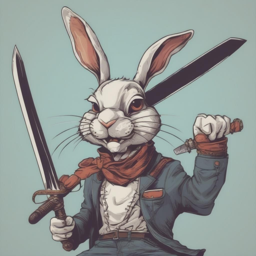

In [3]:

img = gen_image(prompt="crazy rabbit with a sword", width=256, height=256)
display(img)



## **Task 2: Modify the Prompt to generate an image**
Ask the AI to generate an image with a **different style** (e.g., a cartoon, a painting, a photo, etc.).  


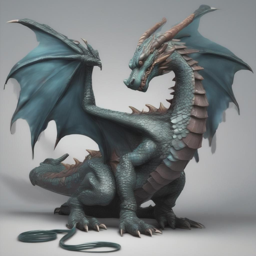

In [4]:
img = gen_image(prompt="cool dragon", width=256, height=256)
display(img)


## **Exercise 3: Create your own Chatbot with Gradio🤖**  
### **👀 Try this first!**  
_(Press **Shift + Enter** to create your own chatbot with Gradio!)_  
📝 **What does this cell do?**  
It guides you through creating a chatbot using Gradio.  

Creating a chatbot with Gradio is an essential skill for building interactive AI applications.
This exercise demonstrates how to set up a chatbot interface, which is useful for engaging users in conversational AI experiences.

Modify


In [5]:
# respond function
def respond(user_message, chat_history):
    # Generate a response
    response = "Hello I am a naive bot"

    chat_history.append((user_message, response))
    return "", chat_history, None

# This is the interface
with gr.Blocks(theme=gr.themes.Soft()) as app:
    gr.Markdown("## 🤖 AI Chatbot")
    gr.Markdown("Enter your message below and let the chatbot respond!")

    chatbot = gr.Chatbot()
    image_output = gr.Image(label="Generated Image")
    user_input = gr.Textbox(
        placeholder="Type your message here...", label="Your Message"
    )
    send_button = gr.Button("Send")

    send_button.click(
        respond,
        inputs=[user_input, chatbot],
        outputs=[user_input, chatbot, image_output],
    )
    user_input.submit(
        respond,
        inputs=[user_input, chatbot],
        outputs=[user_input, chatbot, image_output],
    )

app.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a134cce0698a42b9a4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## **Task 3: Modify the response variable under "Respond" to say something else**
Paste your code below  


In [ ]:
# Your code here


## **Exercise 4: Add AI to your Chatbot with Gradio🤖**  
### **👀 Try this first!**  
_(Press **Shift + Enter** to create your own chatbot with Gradio!)_  
📝 **What does this cell do?**  
It guides you through incorporating AI into your chatbot.  

It generates a text response and an image based on the user's message.

It allows you to
- add external knowledge to the chatbot.
- generate a text response based on the user's message.
- generate an image based on the response.

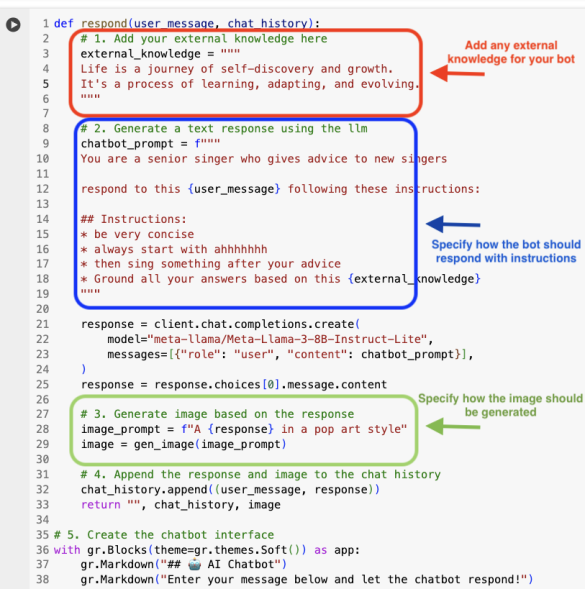

In [6]:
def respond(user_message, chat_history):
    # 1. Add your external knowledge here
    external_knowledge = """
    Sarah is a vert

    """

    # 2. Generate a text response using the llm
    chatbot_prompt = f"""
    You are a lover who gives sweet words as response

    respond to this {user_message} following these instructions:

    ## Instructions:
    * be very concise
    * always start with My dear Sarah
    * then sing something after your advice
    * Ground all your answers based on this book {external_knowledge} and make sure you cite the exact phrase from that book
    """

    response = client.chat.completions.create(
        model="meta-llama/Meta-Llama-3-8B-Instruct-Lite",
        messages=[{"role": "user", "content": chatbot_prompt}],
    )
    response = response.choices[0].message.content

    # 3. Generate image based on the response
    image_prompt = f"A {response} in a pop art style"
    image = gen_image(image_prompt)

    # 4. Append the response and image to the chat history
    chat_history.append((user_message, response))
    return "", chat_history, image

# 5. Create the chatbot interface
with gr.Blocks(theme=gr.themes.Soft()) as app:
    gr.Markdown("## 🤖 AI Chatbot")
    gr.Markdown("Enter your message below and let the chatbot respond!")

    chatbot = gr.Chatbot()
    image_output = gr.Image(label="Generated Image")
    user_input = gr.Textbox(
        placeholder="Type your message here...", label="Your Message"
    )
    send_button = gr.Button("Send")

    send_button.click(
        respond,
        inputs=[user_input, chatbot],
        outputs=[user_input, chatbot, image_output],
    )
    user_input.submit(
        respond,
        inputs=[user_input, chatbot],
        outputs=[user_input, chatbot, image_output],
    )

app.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://eb70674e2bc8c45fa1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



## **Task 4: Create your own Specialized Chatbot!**
Modify the code above to create your own specialized Chatbot with different external knowledge, text response
and different image styles.

You can make the chatbot a lawyer, a therapist, a chef, a singer, a doctor, etc.

You can also make the chatbot generate different image styles such as a cartoon, a painting, a photo, etc.

In [ ]:
def respond(user_message, chat_history):
    # 1. Add your external knowledge here
    external_knowledge = """
    hitchhiker's guide to the galaxy
    """

    # 2. Generate a text response using the llm
    chatbot_prompt = f"""
    You are a senior singer who gives advice to new singers

    respond to this {user_message} following these instructions:

    ## Instructions:
    * be very concise
    * always start with ahhhhhhh
    * then sing something after your advice
    * Ground all your answers based on this book {external_knowledge} and make sure you cite the exact phrase from that book
    """

    response = client.chat.completions.create(
        model="meta-llama/Meta-Llama-3-8B-Instruct-Lite",
        messages=[{"role": "user", "content": chatbot_prompt}],
    )
    response = response.choices[0].message.content

    # 3. Generate image based on the response
    image_prompt = f"A {response} in a pop art style"
    image = gen_image(image_prompt)

    # 4. Append the response and image to the chat history
    chat_history.append((user_message, response))
    return "", chat_history, image

# 5. Create the chatbot interface
with gr.Blocks(theme=gr.themes.Soft()) as app:
    gr.Markdown("## 🤖 AI Chatbot")
    gr.Markdown("Enter your message below and let the chatbot respond!")

    chatbot = gr.Chatbot()
    image_output = gr.Image(label="Generated Image")
    user_input = gr.Textbox(
        placeholder="Type your message here...", label="Your Message"
    )
    send_button = gr.Button("Send")

    send_button.click(
        respond,
        inputs=[user_input, chatbot],
        outputs=[user_input, chatbot, image_output],
    )
    user_input.submit(
        respond,
        inputs=[user_input, chatbot],
        outputs=[user_input, chatbot, image_output],
    )

app.launch()


## Challenge
Create a video of your Chatbot running for 10-60 seconds and share it as a demowith the group.

## 🎉 Congratulations! 🎉
You've successfully created an AI-powered Python application with a user-friendly interface!
